<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [475]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [476]:
df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   expenses  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [478]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: xlabel='bmi', ylabel='expenses'>

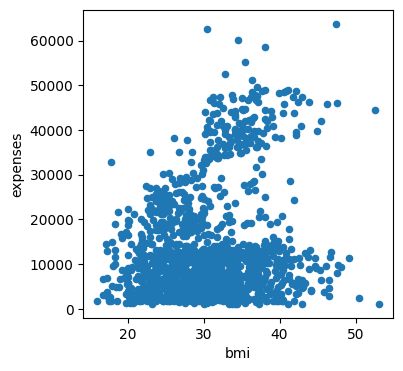

In [479]:
df.plot(kind='scatter', x='bmi', y='expenses', figsize=(4,4))

<Axes: xlabel='age', ylabel='expenses'>

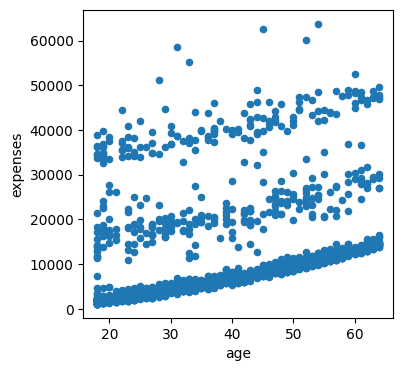

In [480]:
df.plot(kind='scatter', x='age', y='expenses', figsize=(4,4))

<Axes: xlabel='children', ylabel='expenses'>

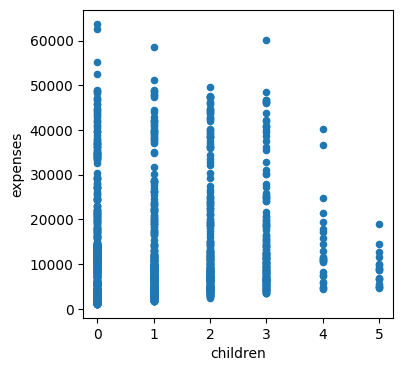

In [481]:
df.plot(kind='scatter', x='children', y='expenses', figsize=(4,4))

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [482]:
from sklearn.model_selection import train_test_split

column = 'age'

def generate_data_sets(df):
  y = df['expenses']
  X = df.drop(df.columns.difference([column]), axis=1)
  return train_test_split(X, y, train_size=0.8, random_state=42)

In [483]:
X_train, X_test, y_train, y_test = generate_data_sets(df)

# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [484]:
from sklearn.linear_model import LinearRegression

def fit_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = fit_model(X_train, y_train)

In [485]:
model.coef_

array([240.59656289])

In [486]:
model.intercept_

3876.9286950300375

In [487]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

y_pred = model.predict(X_test)

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)


all_metrics

,train,test
MAE,9042.42,9173.26
RMSE,11527.29,11661.22
R2,0.08,0.12


# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [488]:
def generate_equation(model):
  sign = '+' if model.intercept_ >= 0 else '-'
  intercept_value = abs(model.intercept_.round(2)) if model.intercept_ < 0 else model.intercept_.round(2)
  return f"expenses = {model.coef_[0].round(2)}*{column} {sign} {intercept_value}"

print(generate_equation(model))

expenses = 240.6*age + 3876.93


# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат

<Axes: >

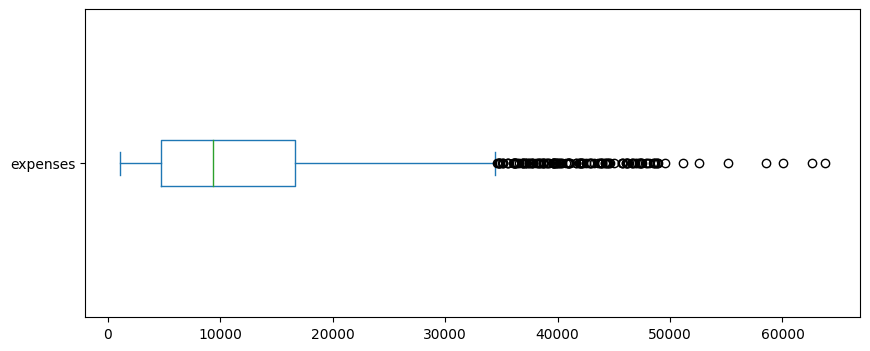

In [489]:
df['expenses'].plot(kind='box', vert=False, figsize=(10,4))

In [490]:
print("Original shape: ", df.shape)
def remove_outliers(df, column_name):
  q1 = df[column_name].quantile(q=0.25)
  q3 = df[column_name].quantile(q=0.75)

  IQR = q3 - q1
  lower = q1 - 1.5*IQR
  upper = q3 + 1.5*IQR

  mask = (df[column_name] >= lower) & (df[column_name] <= upper)
  return df[mask]

df1 = df.copy()
flag = True
original_shape = df1.shape
while flag:
  for column_name in df1.columns:
    if df1.dtypes[column_name] in ("object", "datetime64[ns]"):
      continue

    df1 = remove_outliers(df1, column_name)

  if df1.shape < original_shape:
    original_shape = df1.shape
  else:
    flag = False

print("New shape: ", df1.shape)

Original shape:  (1338, 4)
New shape:  (1105, 4)


<Axes: >

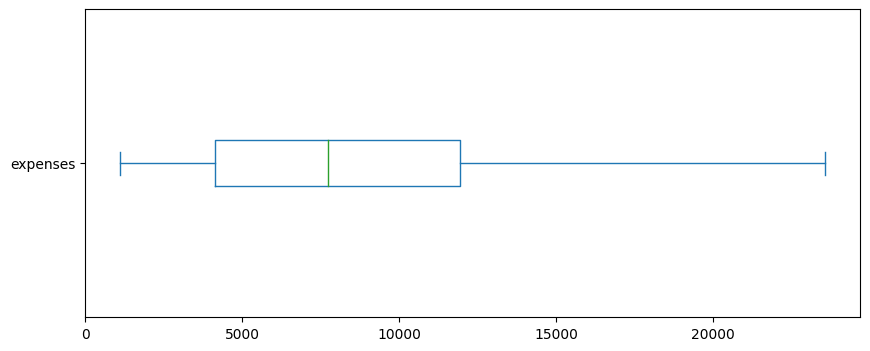

In [491]:
df1['expenses'].plot(kind='box', vert=False, figsize=(10,4))

In [492]:
X_train, X_test, y_train, y_test = generate_data_sets(df1)
model_without_outliers = fit_model(X_train, y_train)


In [493]:
model_without_outliers.coef_

array([201.08587392])

In [494]:
model_without_outliers.intercept_

911.4705829040377

In [495]:
print(f"DF original: {generate_equation(model)}")

print(f"DF without outliers: {generate_equation(model_without_outliers)}")

DF original: expenses = 240.6*age + 3876.93
DF without outliers: expenses = 201.09*age + 911.47


In [496]:
y_pred = model_without_outliers.predict(X_test)
all_metrics["train_without_outliers"] = get_metrics(y_train, model_without_outliers.predict(X_train))
all_metrics["test_without_outliers"] = get_metrics(y_test, y_pred)
all_metrics

,train,test,train_without_outliers,test_without_outliers
MAE,9042.42,9173.26,3185.07,3161.76
RMSE,11527.29,11661.22,4692.51,4642.08
R2,0.08,0.12,0.26,0.29
